# Company Transformation

In this project we'll look through data of a tech company that is eager to improve its operations after a global pandemic has taken the world by storm.

I will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:

- Is the company in good financial health?
- Does the company need to let go of any employees?
- Should the company allow employees to work from home permanently?


## Analyzing Revenue and Expenses

The management team of the company I work for is concerned with the status of the company after a global pandemic. The CFO (Chief Financial Officer) asks me to perform some data analysis on the past six months of the company’s financial data.

Let's import necessary libraries and upload data in a variable `financial_data`.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Load in financial data
financial_data = pd.read_csv('financial_data.csv')

Now let's examine the first 5 rows of the first file.

In [2]:
financial_data.head(5)

,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000
2,3,1050000,551000
3,4,920000,612000
4,5,807000,628000


We can see that `financial_data` has three columns – "Month", "Revenue", and "Expenses". We are going to store each column in three separate variables called `month`, `revenue`, and `expenses` to visualise them faster. 

In [3]:
month = financial_data.Month
revenue = financial_data.Revenue
expenses = financial_data.Expenses

Let's see how a plot of revenue over the past six months may look like.

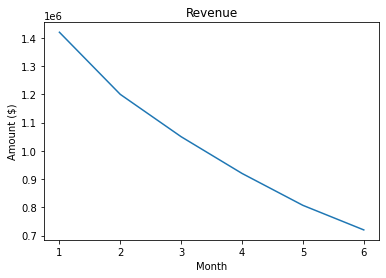

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(month, revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')
plt.show()
plt.clf()

What about expenses?

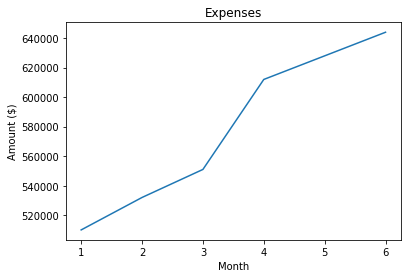

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(month, expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses')
plt.show()
plt.clf()

As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk. After you show this chart to the management team, they are alarmed. They conclude that expenses must be cut immediately and give you a new file to analyze called **expenses.csv**.

Let's use pandas to read in expenses.csv and store it in a variable called `expense_overview` and print the first 5 rows of the data.

In [6]:
expense_overview = pd.read_csv('expenses.csv')
expense_overview.head(5)

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03


## Visualization of Expenses via Pie Chart

We can see that there are two columns:

- `Expense`: indicates the expense category;
- `Proportion`: indicates how much of the overall expenses a specific category takes up.

Let's store the "Expense" column in a variable called `expense_categories` and the "Proportion" column in a variable called `proportions` to create pie chart.


In [7]:
expense_categories = expense_overview.Expense
proportions = expense_overview.Proportion 

ext, we want to create a pie chart of the different expense categories.

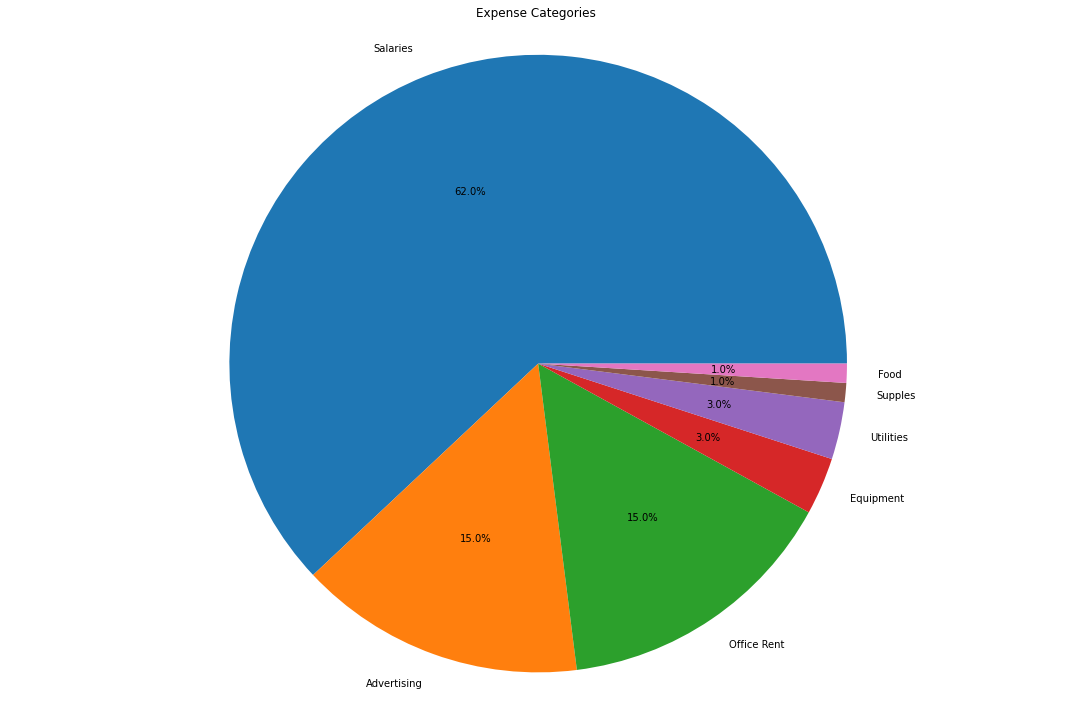

<Figure size 432x288 with 0 Axes>

In [19]:
# Prepare grid
plt.figure(figsize = (15,10))
plt.pie(proportions, labels = expense_categories, autopct = '%1.1f%%')
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()
plt.clf()

It seems that "Salaries", "Advertising", and "Office Rent" make up most of the expenses, while the rest of the categories make up a small percentage, so we better hide the small expenses under "Other" section for better visual experience.

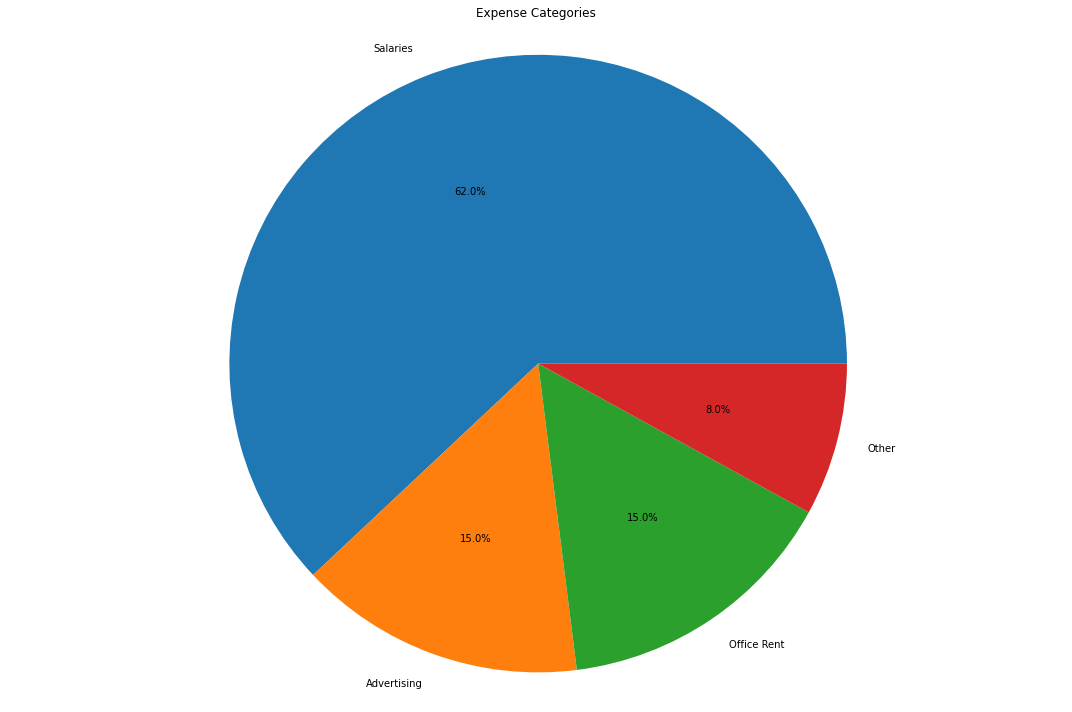

<Figure size 432x288 with 0 Axes>

In [20]:
# Sum small expenses and save it inder "Other"
grouped = pd.concat([
    expense_overview[:3],
    pd.DataFrame([['Other', expense_overview[3:].Proportion.sum()]], columns=expense_overview.columns),
])

# Save values and labels in separate variables
proportion_short = grouped.Proportion
expense_short = grouped.Expense

# Prepare grid
plt.figure(figsize = (15,10))
plt.pie(proportion_short, labels = expense_short, autopct = '%1.1f%%')
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()
plt.clf()


This simplified pie chart helps the management team see a big picture view of the company’s expenses without getting distracted by noisy data.

## Employee Productivity

Salaries make up 62% of expenses. So the management team determines that to cut costs in a meaningful way, they must let go of some employees.

Each employee at the company is assigned a productivity score based on their work. The management would like to keep the most highly productive employees and let go of the least productive employees.

Let's once again use pandas to load in **employees.csv** and store it in a variable called `employees` and print some rows.

In [10]:
employees = pd.read_csv('employees.csv')
employees.head(5)

,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58


There is a "Productivity" column, which indicates the productivity score assigned to that employee. Since we need to keep the most productive employees it's reasonable to sort this column in ascending order and store the result in a variable called `sorted_productivity`.

In [11]:
sorted_productivity = employees.sort_values(by=['Productivity'])
sorted_productivity

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
164,Miki Hartle,50856,99.54,31.39
88,Darell Nau,30530,99.63,44.25
23,Joaquina Neece,95562,99.66,48.65
202,Janae Officer,110139,99.69,15.45


We now see the employees with the lowest productivity scores at the top of the data frame. 

Let's store 100 least productive employees in a separate variable for managers to get familiar with the list.

In [12]:
employees_cut = sorted_productivity[:100]
employees_cut

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
43,Bernardo Klingenberg,55464,34.52,32.27
186,Ashleigh Istre,178627,34.70,38.67
288,Penni Kimbrough,142680,35.21,49.64
269,Margot Mackenzie,114302,35.79,19.87


## Commute Times and Log Transformation

The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic. He first wants to take a look at roughly how long the average commute time is for employees at the company. He asks for me help to analyze this data.

The employees data frame has a column called Commute Time that stores the commute time (in minutes) for each employee.

Let's create a variable called `commute_times` that stores the "Commute Time" column.

In [13]:
commute_times = employees['Commute Time']

Now let’s do some quick analysis on the commute times of employees.

In [14]:
commute_times.describe()

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64

In [15]:
# Find median
commute_times.median()

31.060000000000002

Additionally, let’s explore the shape of the commute time data using a histogram.

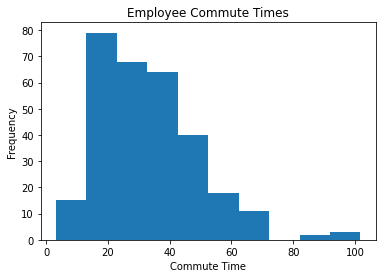

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot histogram
plt.hist(commute_times)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()
plt.clf()

The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.

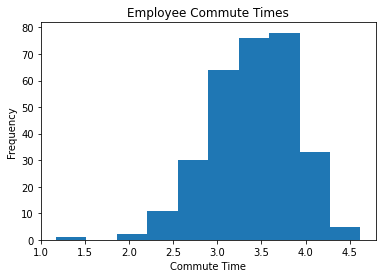

<Figure size 432x288 with 0 Axes>

In [17]:
# Log transformation
commute_times_log = np.log(commute_times)

# Plot histogram
plt.hist(commute_times_log)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()
plt.clf()

## Conclusion

In this project, we performed data analysis to help a management team answer important questions about the status of the company during a difficult time by applying common data transformation techniques to the company's datasets.

We figured out that the financial situation at the company is far from good and the biggest expense source is salaries. Also, we found out that the average commute time is 30 min, but at the same time, 75% of employees commute a bit more than 40 min, and the minimum and the maximum time are 3 minutes and a bit less than 2 hours respectfully. 